## Medical image classification (Kaggle Chest X-Ray Pneumonia)

Kaggle-ChestXRay-Pneumonia/

  train/
    NORMAL/
    PNEUMONIA/
    
  test/
    NORMAL/
    PNEUMONIA/
    
  val/
    NORMAL/
    PNEUMONIA/

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

##### ImageDataGenerator class

Data Augmentation Parameters
* rotation_range: Randomly rotates images within a specified range of degrees.
* width_shift_range & height_shift_range: Shifts images horizontally and vertically.
* shear_range: Applies shearing transformations.
* zoom_range: Randomly zooms into or out of the image.
* horizontal_flip: Flips images horizontally.
* vertical_flip: Flips images vertically.
* fill_mode: Defines how to fill new pixels created by transformations ('nearest', 'reflect', etc.).

Normalization and Scaling
* rescale: Scales image pixel values. For example, rescale=1./255 scales pixel values to the range [0, 1] (from [0, 255]).
* featurewise_center & featurewise_std_normalization: Centers and normalizes images based on dataset statistics.
* samplewise_center & samplewise_std_normalization: Centers and normalizes each image individually.

It is especially helpful for Convolutional Neural Networks (CNNs), where:
* Overfitting is a concern due to limited data.
* Input images need preprocessing (e.g., scaling and normalization).

Examples include:
* Image classification tasks.
* Object detection and localization models.
* Medical imaging models (e.g., chest X-ray analysis).

In [2]:
# Define dataset path
dataset_dir = "/Users/ohajati/Desktop/CNN/Kaggle-ChestXRay-Pneumonia"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

### train_dir = os.path.join(dataset_dir, "train")
I could write:
train_dir = "/Users/ohajati/Desktop/CNN/Kaggle-ChestXRay-Pneumonia/train"

However, os.path.join() is preferred because:
Cross-Platform Compatibility: 1- On Windows, paths use backslashes (\) instead of forward slashes (/). 2- Writing paths manually might fail on different systems.
os.path.join automatically uses the correct separator for your operating system.
Dynamic and Flexible: If dataset_dir changes (e.g., moved to another location), you only need to update dataset_dir, not every instance of the hardcoded path. It prevents human errors like typing the wrong path or separator.

In [3]:
# Step 1: Data Visualization and Exploration
def display_images_simple(directory):
    categories = ["NORMAL", "PNEUMONIA"]
    plt.figure(figsize=(10, 5))
    for i, category in enumerate(categories):
        folder_path = os.path.join(directory, category)
        img_path = os.path.join(folder_path, os.listdir(folder_path)[0])  # Take the first image
        img = plt.imread(img_path)
        plt.subplot(1, 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Sample images from training data:


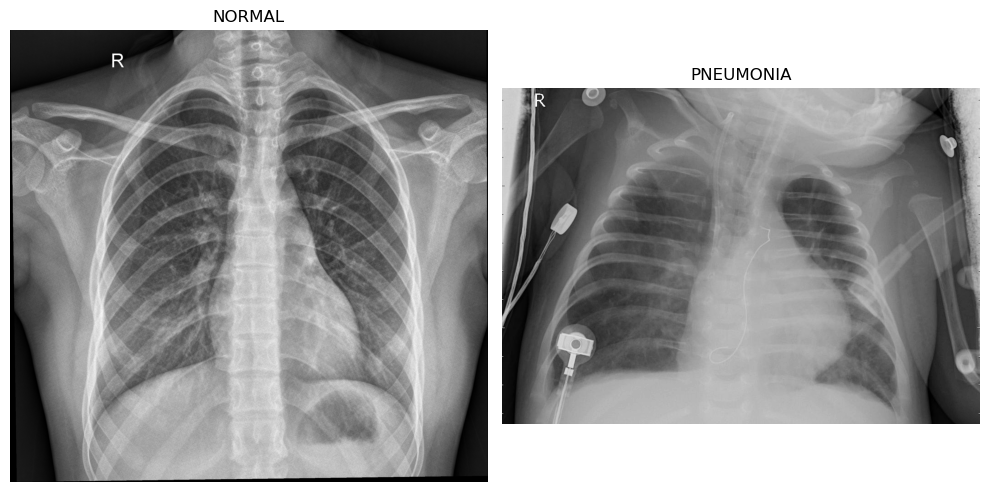

In [4]:
# Display images from training data
print("Sample images from training data:")
display_images_simple(train_dir)

In [5]:
# Count images in each class
def count_images_simple(directory):
    categories = ["NORMAL", "PNEUMONIA"]
    counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return counts

train_counts = count_images_simple(train_dir)
print("Training Data Distribution:", train_counts)

Training Data Distribution: {'NORMAL': 1341, 'PNEUMONIA': 3875}


###### Count files in the folder
* os.listdir(folder_path) returns a list of all files and folders inside folder_path.
* len() counts how many items are in that list.
 
file_count = len(os.listdir(dataset_dir))  
print(f"There are {file_count} files in the folder.")

answer: There are 4 files in the folder.


In [6]:
# Step 2: Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)  # Scale pixel values to [0, 1]
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, "val"),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, "test"),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Step 4: Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


2024-11-22 13:24:02.369568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-22 13:24:02.394627: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


163/163 [==============================] - 29s 177ms/step - loss: 0.2059 - accuracy: 0.9178 - val_loss: 0.2524 - val_accuracy: 0.8750
Epoch 2/10


2024-11-22 13:24:31.478674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 30s 181ms/step - loss: 0.1092 - accuracy: 0.9620 - val_loss: 0.2476 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 29s 180ms/step - loss: 0.0815 - accuracy: 0.9718 - val_loss: 0.3768 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 29s 179ms/step - loss: 0.0578 - accuracy: 0.9785 - val_loss: 0.4021 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 30s 183ms/step - loss: 0.0448 - accuracy: 0.9831 - val_loss: 0.1765 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 30s 186ms/step - loss: 0.0485 - accuracy: 0.9814 - val_loss: 0.1072 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 30s 186ms/step - loss: 0.0334 - accuracy: 0.9879 - val_loss: 0.1808 - val_accuracy: 0.9375
Epoch 8/10
163/163 [==============================] - 31s 188ms/step - loss: 0.0305 - accuracy: 0.9887 - val_loss: 0.3277 - val_accuracy: 0.8

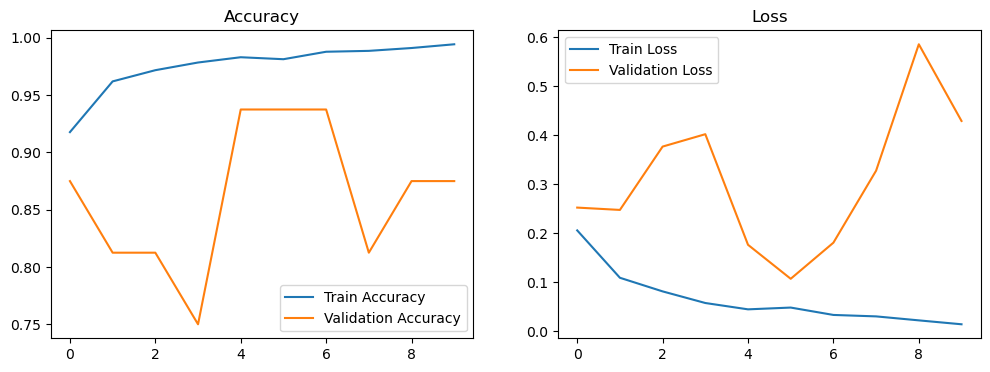

In [11]:
# Step 5: Evaluate the Model
# Plot Accuracy and Loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_history(history)

In [12]:
# Test the Model
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_generator.classes

2024-11-22 13:35:29.960014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 3s 118ms/step


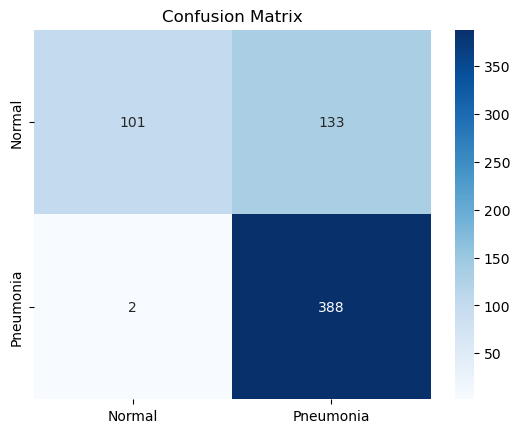

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.43      0.60       234
   Pneumonia       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.86      0.71      0.73       624
weighted avg       0.83      0.78      0.76       624



* Key Metric Explanations:
* Precision: Measures the proportion of correctly identified instances out of all instances the model classified as a specific class. A high precision for "Normal" (0.98) suggests that when the model predicts "Normal," it is correct most of the time.

* Recall: Indicates how well the model captures all the relevant instances of a specific class. The recall for "Pneumonia" (0.99) is excellent, meaning almost all "Pneumonia" cases are identified.

* F1-Score: The harmonic mean of precision and recall. It balances false positives and false negatives, making it a good measure when classes are imbalanced. "Pneumonia" has a higher F1-score (0.85), indicating better performance compared to "Normal" (0.60).

* Support: Represents the number of actual occurrences of each class in the dataset. Here, "Normal" has 234 samples, and "Pneumonia" has 390 samples.

* Macro Average: The arithmetic mean of precision, recall, and F1-score for all classes. Treats all classes equally, regardless of their support.

* Weighted Average: Takes the support of each class into account, providing a more balanced overall metric.

* Observations:
The model has strong precision for "Normal" but struggles with recall, indicating it misses many actual "Normal" cases.
It performs very well in identifying "Pneumonia" (high recall and F1-score).
The overall accuracy of the model is 0.78, which reflects the ratio of correct predictions to total predictions.

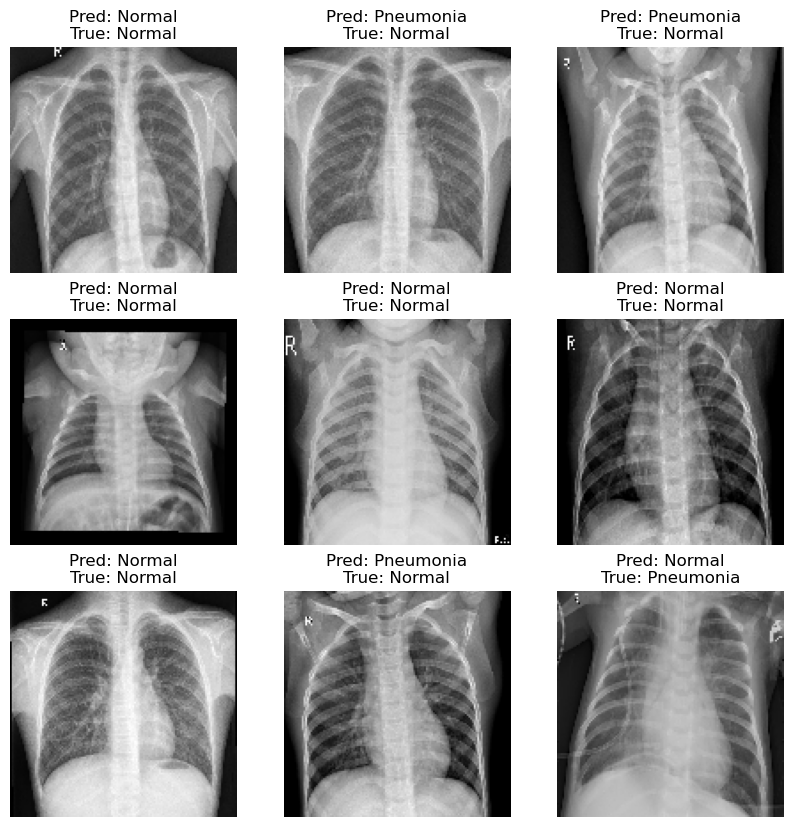

In [15]:
# Example Prediction Visualization
def visualize_predictions(generator, predictions, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        img, label = generator[i]
        plt.subplot(3, 3, i + 1)
        plt.imshow(img[0], cmap='gray')
        pred_label = "Pneumonia" if predictions[i] == 1 else "Normal"
        true_label = "Pneumonia" if label[0] == 1 else "Normal"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

visualize_predictions(test_generator, y_pred)


## Observations

##### Class "Normal":
* Precision (0.96): The model is highly precise in predicting "Normal," meaning that when it predicts "Normal," it is usually correct.
* Recall (0.21): The recall is very low, meaning the model fails to identify most of the true "Normal" cases.
* F1-score (0.34): The low F1-score reflects poor balance between precision and recall for this class.

##### Class "Pneumonia":
* Precision (0.68): Moderately precise in predicting "Pneumonia."
* Recall (0.99): Very high, meaning it identifies almost all true "Pneumonia" cases.
* F1-score (0.81): Reflects good overall performance for this class.

##### Overall Accuracy (0.70):
* The accuracy is 70%, but it is skewed by the model's tendency to favor the "Pneumonia" class due to its much higher recall.

* Macro and Weighted Averages:
* The macro average (0.57 for F1-score) shows imbalance between the two classes.
* The weighted average (0.63 for F1-score) reflects the dominant influence of the "Pneumonia" class in the predictions.

* Assessment: The model is heavily biased toward the "Pneumonia" class, which leads to:
* Missing many "Normal" cases (low recall for "Normal").
* High sensitivity for "Pneumonia" but at the expense of overall performance.

* This is not ideal, especially in medical applications where both false negatives (missing actual cases) and false positives (mislabeling healthy patients) can have serious consequences.

##### Suggestions for Improvement
##### Data Imbalance:
* dataset might be imbalanced (more "Pneumonia" images than "Normal"). Check the class distribution and use techniques like:
* Oversampling the minority class (e.g., augmenting "Normal" images).
* Undersampling the majority class.
* Using class weights during training to balance the loss function.
##### Model Architecture:
* Experiment with deeper architectures or pre-trained models like ResNet, VGG, or EfficientNet using transfer learning. These models are more robust for medical image classification tasks.
##### Data Augmentation:
* Add more aggressive augmentation to increase the diversity of training samples (e.g., rotations, flips, brightness adjustments).
##### Evaluation Metrics:
* Monitor metrics like AUROC (Area Under the Receiver Operating Characteristic Curve), which balances precision and recall for binary classification.
##### Hyperparameter Tuning:
* Adjust hyperparameters like learning rate, batch size, or optimizer.
* Use learning rate schedulers or regularization techniques to improve generalization.
##### Cross-Validation:
* Use k-fold cross-validation to ensure the model generalizes well across different subsets of the data.
